# Data Exploration

In [3]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns

### Load dataset

In [4]:
# Load dataset
data = pd.read_csv(r"Mental Health Dataset.csv")

### Check column names and shape

In [5]:
# Check columns
print(data.columns)
print(f"\n{data.shape}")

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

(292364, 17)


### Check head

In [6]:
# Print first 5 rows
data.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### Check missing values and data types

In [7]:
# Get some information
data.info() # There are only missing values for `self_employed` (292364 - 287162 = 5202 missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

Display missings using a missings plot

<AxesSubplot:>

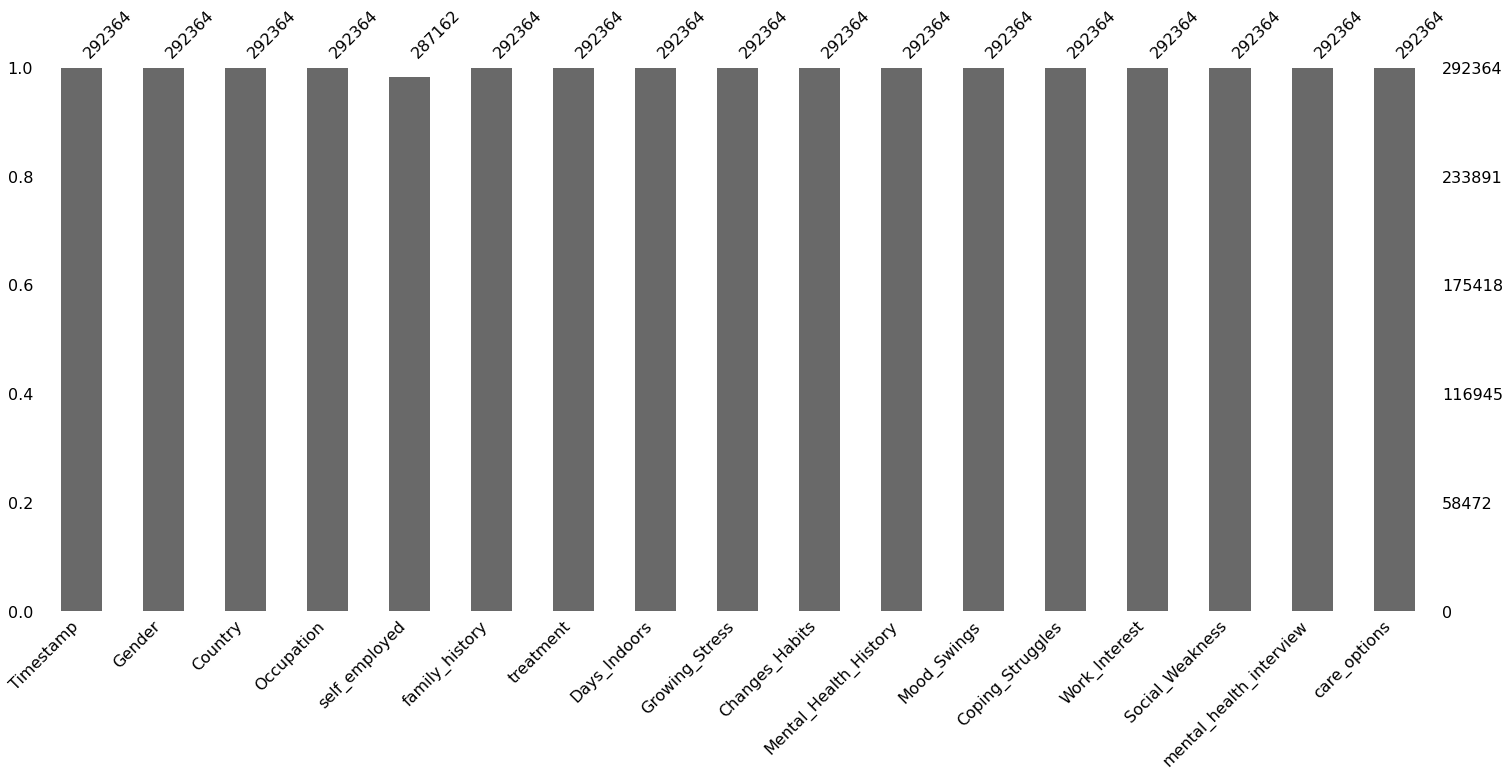

In [8]:
plt.figure(figsize=(12, 5))
msno.bar(data)

### Check distribution of values

First, for all columns except 'Timestamp' and 'Country'

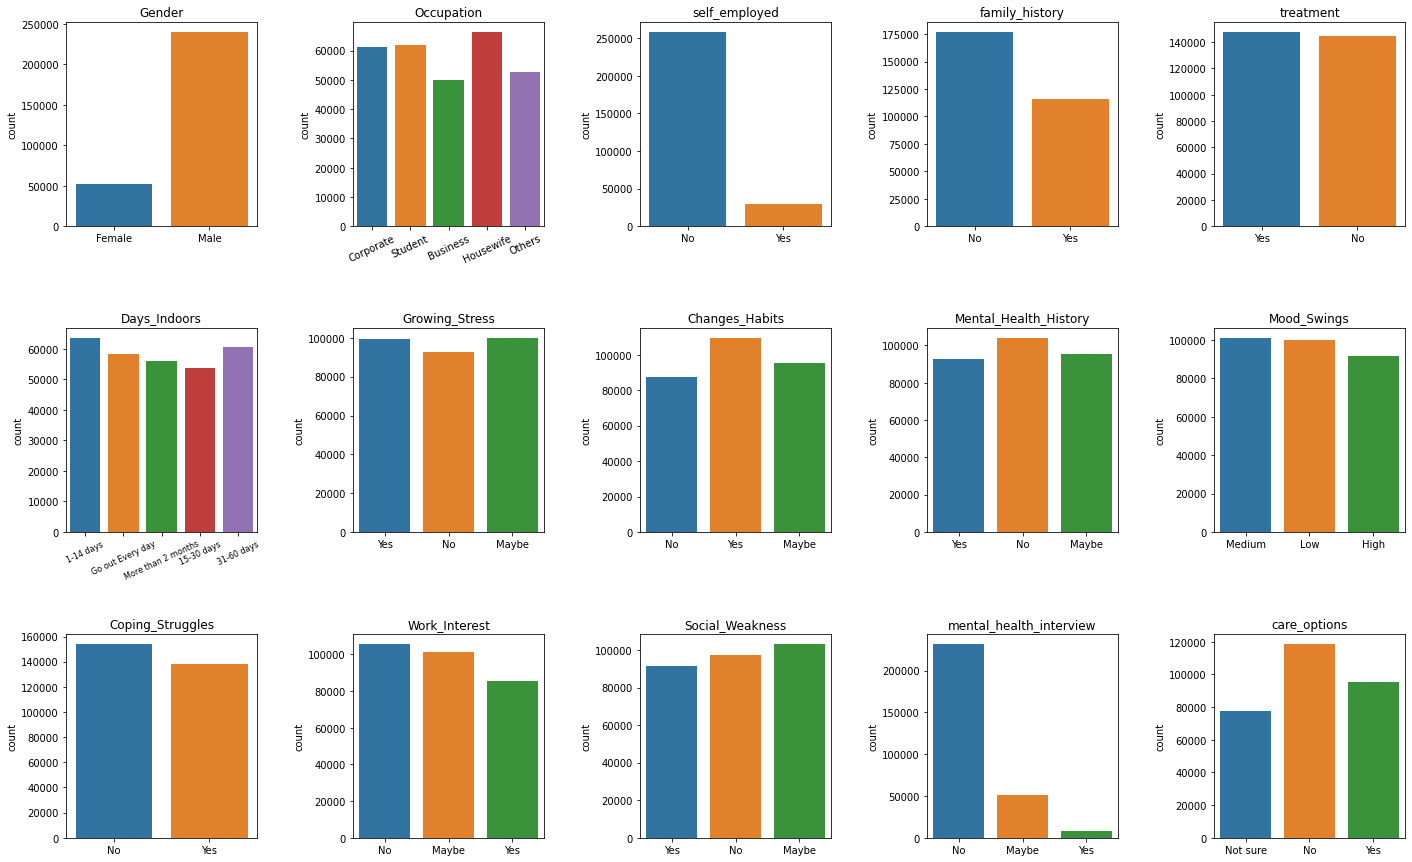

In [9]:
# Exclude `Timestamp` & `Country` columns
vis_cols = [col for col in data.columns if col != "Timestamp" if col != "Country"]

figsize = (len(vis_cols)//4), len(vis_cols) // (len(vis_cols)//4)
fig, axes = plt.subplots(nrows=figsize[0], ncols=figsize[1], figsize=(24, 15))

# Adjust the space between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plot counts
for column, ax in zip(vis_cols, axes.flatten()):
    sns.countplot(data=data, x=column, ax=ax)
    if len(data[column].unique()) > 3:
        if column == 'Days_Indoors':
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25, fontsize=8)
        else:
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
    ax.set_xlabel("")
    ax.set_title(column)
plt.show()

Now for 'Country' column

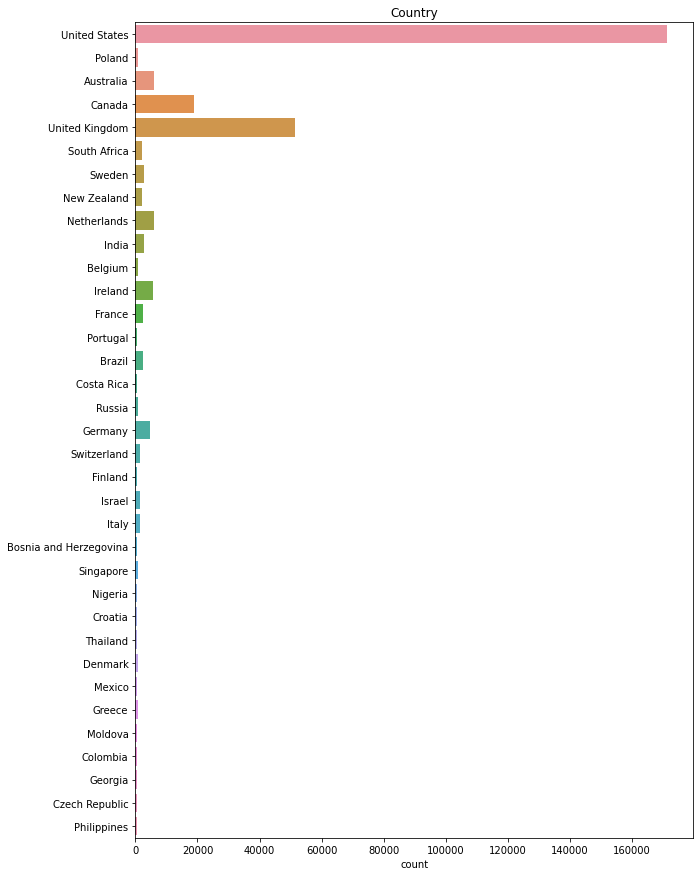

In [10]:
plt.figure(figsize=(10, 15))
sns.countplot(data=data, y="Country")
plt.ylabel("")
plt.title("Country")
plt.show()

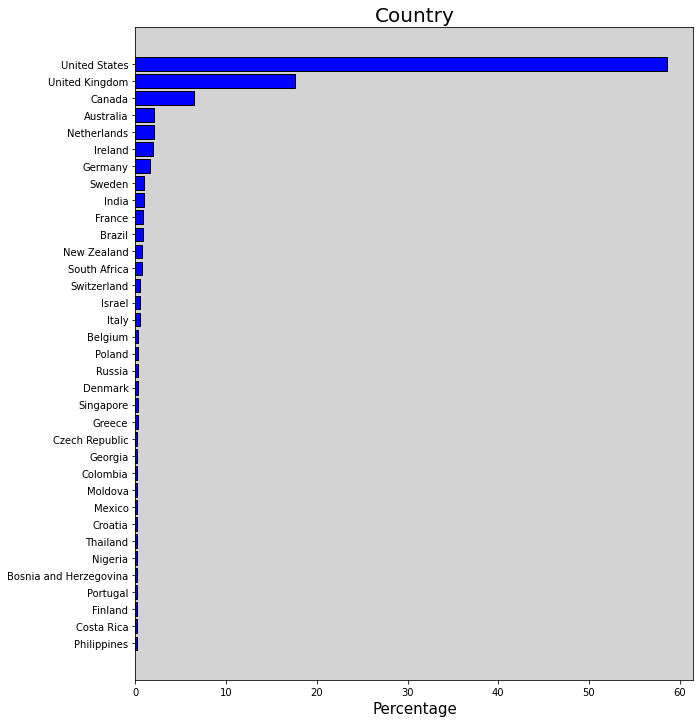

In [11]:
country_counts = pd.DataFrame(data['Country'].value_counts())
country_counts['Country'] = country_counts['Country'].values / country_counts['Country'].sum() * 100
country_counts.rename(columns={"Country": "Percentage"}, inplace=True)
country_counts["Country"] = country_counts.index
country_counts.index = range(len(country_counts))
country_counts = country_counts.loc[:, ["Country", "Percentage"]]



plt.figure(figsize=(10, 12))
plt.barh(y=range(len(country_counts)), width=country_counts["Percentage"].values[::-1],
         color='blue', edgecolor='black')
plt.yticks(range(len(country_counts)), country_counts["Country"].values[::-1])
plt.title("Country", fontsize=20)
plt.gca().set_facecolor('LightGrey')
plt.xlabel('Percentage', fontsize=15)
plt.show()

As we can see, the majority of participants (~58.6%) originate from the United States. A substantial minority comes from the United Kingdom (17.6%). Canadians form the third-largest nationality among participants, comprising ~6.4%. ~2.1% and ~2.0% of participants are of Australian and Dutch origin, respectively. Other nationalities encompass below 2% of all participants. 

# Data Transformation

Let's one-hot encode categorical variables (besides `Country`).

In [12]:
data_onehot = pd.get_dummies(data.loc[:, vis_cols]) # Dummy variables -- one-hot encoded
data_time_country = data.loc[:, ["Timestamp", "Country"]] # Timestamp & Country variables
data_onehot = pd.concat([data_time_country, data_onehot], axis=1) # Concatenate both dataframes
data_onehot.loc[pd.isnull(data["self_employed"]), "self_employed_No"] = np.nan # Make sure missing values are retained

In [13]:
data_onehot.head()

,Timestamp,Country,Gender_Female,Gender_Male,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,Occupation_Student,self_employed_No,...,Work_Interest_Yes,Social_Weakness_Maybe,Social_Weakness_No,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes
0,8/27/2014 11:29,United States,1,0,0,1,0,0,0,NaN,...,0,0,0,1,0,1,0,0,1,0
1,8/27/2014 11:31,United States,1,0,0,1,0,0,0,NaN,...,0,0,0,1,0,1,0,1,0,0
2,8/27/2014 11:32,United States,1,0,0,1,0,0,0,NaN,...,0,0,0,1,0,1,0,0,0,1
3,8/27/2014 11:37,United States,1,0,0,1,0,0,0,1.0,...,0,0,0,1,1,0,0,0,0,1
4,8/27/2014 11:43,United States,1,0,0,1,0,0,0,1.0,...,0,0,0,1,0,1,0,0,0,1


### Remove some variables for redundancy

In [14]:
# Remove these variables: Gender_Male, self_employed_Yes, treatment_No, Coping_Struggles_No, Mood_Swings_Low
for variable in ["Gender_Male", "self_employed_Yes", "treatment_No", "Coping_Struggles_No", "Mood_Swings_Low", "family_history_No", 
                 "Growing_Stress_No", "Changes_Habits_No", "Mental_Health_History_No", "Work_Interest_No", "Social_Weakness_No", 
                 "mental_health_interview_No", "care_options_No"]:
    del data_onehot[variable]

### Detect percentage of people who had treatment for mental health issues per country

In [15]:
country_treatment = pd.DataFrame(data_onehot.groupby("Country")["treatment_Yes"].mean())\
    .reset_index().sort_values(["treatment_Yes", "Country"], ascending=[False, True]).reset_index(drop=True)
country_treatment

,Country,treatment_Yes
0,Croatia,1.000000
1,Denmark,1.000000
2,Moldova,1.000000
3,Poland,1.000000
4,New Zealand,0.804413
5,South Africa,0.608826
6,Australia,0.604381
7,United States,0.543069
8,Canada,0.539464
9,Germany,0.500000


### Average treatment per category

In [16]:
# for col in X.columns.values:
#     col_treatment = pd.DataFrame(data_onehot.groupby(col)["treatment_Yes"].mean())\
#         .reset_index().sort_values(["treatment_Yes", col], ascending=[True, True])
#     display(col_treatment)

# Feature importances

Detect feature importances using RandomForestClassifier. Let the outcome variable be `treatment_Yes`. Let's first get a sample of 20% the size of the original dataset

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Get 20% sample to detect feature importances
X = data_onehot.loc[:, [col for col in data_onehot if col != "treatment_Yes" if col != "Timestamp" if col != "Country"]]
y = data_onehot.loc[:, "treatment_Yes"]
X_20, _, y_20, _ = train_test_split(X, y, train_size=0.2, stratify=y, random_state=0)

Let's now fit a RandomForestClassifier to detect feature importances

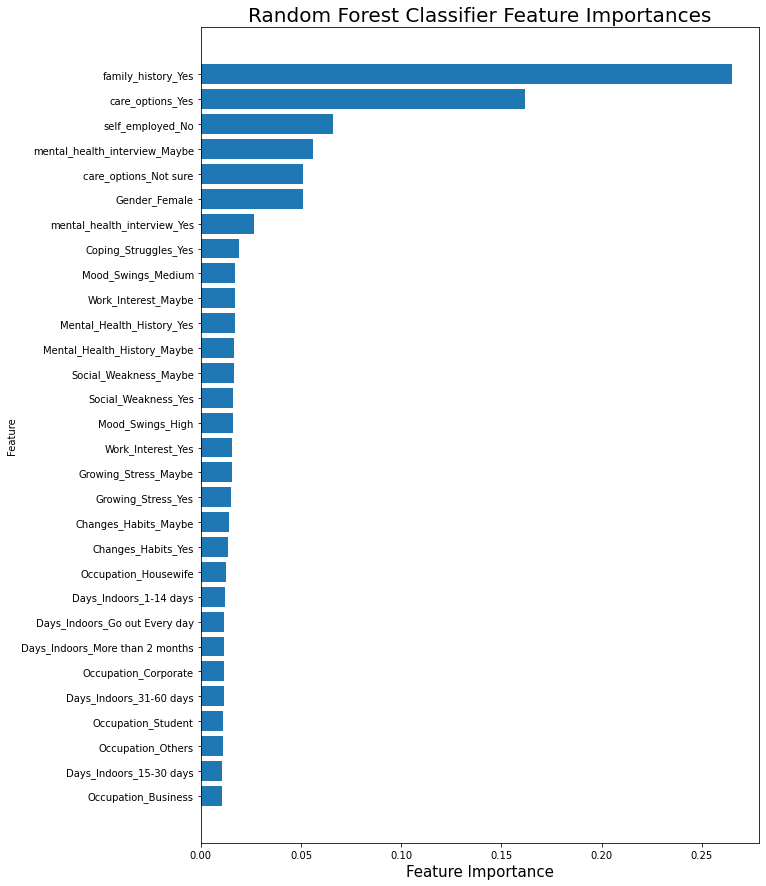

In [18]:
rf_classifier = RandomForestClassifier(random_state=0)

# Train the model with your data
rf_classifier.fit(X_20, y_20)  # Assuming X_train and y_train are your training features and labels

import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have importances and column names
importances = rf_classifier.feature_importances_
column_names = X_20.columns

# Sort feature importances and corresponding column names
indices = np.argsort(importances)
sorted_column_names = [column_names[i] for i in indices]
sorted_importances = importances[indices]

# Plot the feature importances
plt.figure(figsize=(10, 15))
plt.barh(range(len(indices)), sorted_importances, align="center")
plt.yticks(range(len(indices)), sorted_column_names)
plt.xlabel("Feature Importance", fontsize=15)
plt.ylabel("Feature")
plt.title("Random Forest Classifier Feature Importances", fontsize=20)
plt.show()



Finally, let's detect how accurate the RandomForestClassifier actually is.

In [19]:
from sklearn.metrics import accuracy_score

# Get train and test data
X_train, _, y_train, _ = train_test_split(X, y, train_size=0.5, stratify=y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=0)

# Fit model
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6833884391745525


# Add interaction terms

Let's see if adding interaction terms will have an effect on model performance. We first have to impute missing data in order for this to work.

In [20]:
# From https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

# Impute missing values
imp = IterativeImputer(random_state=0)
X_imp = imp.fit_transform(pd.concat([X, y], axis=1))

# Convert to dataframe
X_imp = pd.DataFrame(X_imp[:, :-1], columns=X.columns)
X_imp["self_employed_No"] = X_imp["self_employed_No"].round().values

Now add the interaction terms. Delete squared terms because they are the same as the original variable (since they only have values of 0 and 1).

In [21]:
from sklearn.preprocessing import PolynomialFeatures

# Extract the feature names
feature_names = X_imp.columns

# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the data to compute interaction terms -- also include y variable for imputation
X_int = poly.fit_transform(X_imp)

# Get the names of the new interaction variables
interaction_feature_names = poly.get_feature_names_out(feature_names)

# Create a new DataFrame with interaction variables -- exclude y variable
X_int = pd.DataFrame(X_int, columns=interaction_feature_names)

# Delete squared columns -- no use for dummy variables
for col in X_int.columns.values:
    if col[-2:] == "^2":
        del X_int[col]

### RandomForest Classifier

Again, perform classification using a RandomForestClassifier. As before, first split the data into train and test data.

In [22]:
# Get train and test data
X_train_int, _, y_train, _ = train_test_split(X_int, y, train_size=0.5, stratify=y, random_state=0)
X_train_int, X_test_int, y_train, y_test = train_test_split(X_train_int, y_train, test_size=0.3, stratify=y_train, 
                                                                    random_state=0)

# Fit model
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train_int, y_train)

# Make predictions
y_pred_int = rf_classifier.predict(X_test_int)
accuracy = accuracy_score(y_test, y_pred_int)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6796944476114468


We see that adding interaction terms does not improve model performance.